# Transform Candlestick Patterns: just before

In [100]:
from src import utils as u
import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np

## Get the data

In [59]:
input_data_path = '../data'
input_data_filename = 'binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_raw'
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [60]:
df = pd.read_csv(full_path_input_data)

In [92]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1577836800000,7195.24,7196.25,7183.14,7186.68,51.642812,1577836859999,371233.518355,493,19.598230,...,3.54,8.56,0,0,0,0,0,0,0,0
2020-01-01 00:01:00,1577836860000,7187.67,7188.06,7182.20,7184.03,7.248148,1577836919999,52080.127788,135,2.031772,...,1.83,3.64,0,0,0,0,0,0,0,0
2020-01-01 00:02:00,1577836920000,7184.41,7184.71,7180.26,7182.43,11.681677,1577836979999,83903.741635,202,5.479244,...,2.17,1.98,0,0,0,0,0,0,0,0
2020-01-01 00:03:00,1577836980000,7183.83,7188.94,7182.49,7185.94,10.025391,1577837039999,72033.226649,136,3.294966,...,1.34,2.11,0,0,0,0,0,0,0,0
2020-01-01 00:04:00,1577837040000,7185.54,7185.54,7178.64,7179.78,14.911105,1577837099999,107066.521825,161,2.369033,...,1.14,5.76,0,0,0,0,0,0,0,0


## Set the index on the dataframe

In [61]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [62]:
window_size = 50
slope_size = 7

### Get the dates from the bullish candlesticks patterns

In [63]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()

In [95]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [64]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')

BEFORE: number of inverted hammer:7061
BEFORE: number of hammer:34556
BEFORE: number of piercing:282
BEFORE: number of morning star:3546


#### Run the checks to identify the real candlesticks with reversal

In [97]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
for date in list_dates_invertedhammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(-1)
    else:
        list_new_sign_invertedhammer.append(0)

In [66]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
for date in list_dates_hammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(-1)
    else:
        list_new_sign_hammer.append(0)        

In [67]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
for date in list_dates_piercing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(-1)
    else:
        list_new_sign_piercing.append(0)         

In [68]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
for date in list_dates_morningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(-1)
    else:
        list_new_sign_morningstar.append(0)          

#### Get the amount of candlesticks patterns (after check)

In [98]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')

AFTER: number of inverted hammer:273
AFTER: number of hammer:1501
AFTER: number of piercing:12
AFTER: number of morning star:277


### Plot some results

#### Inverted Hammer

602343


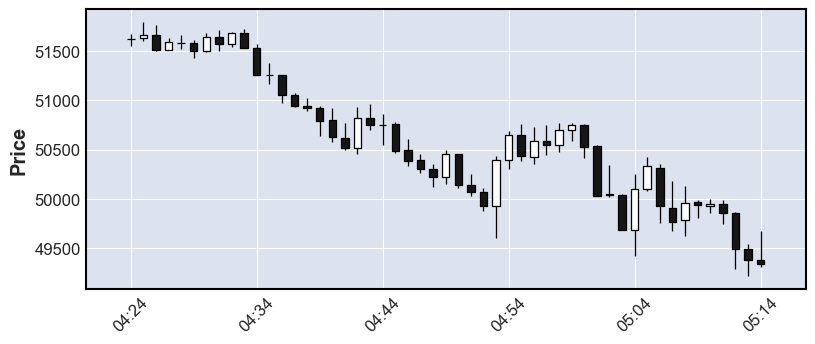

In [70]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hammer

66534


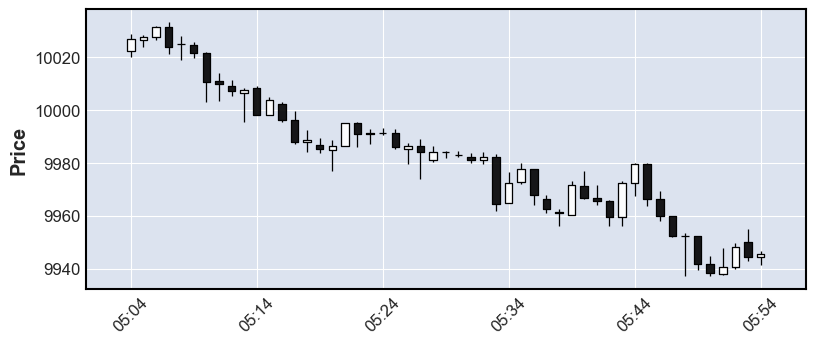

In [71]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

888198


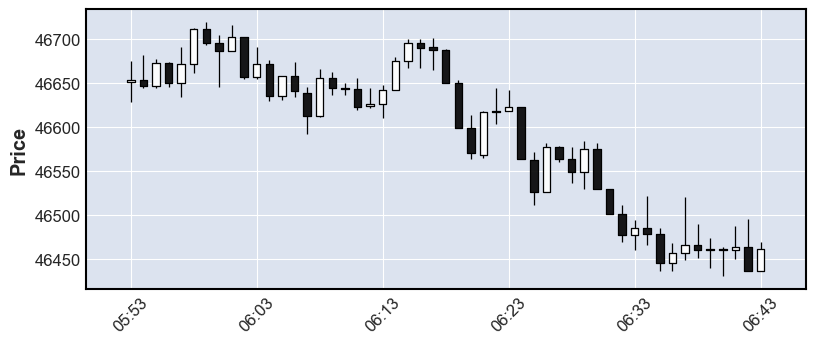

In [72]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Morning Star

980977


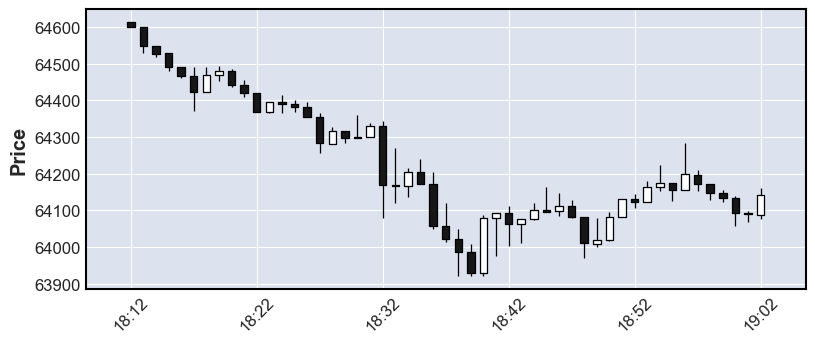

In [73]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [74]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [75]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')

BEFORE: number of shooting star:8400
BEFORE: number of hangingman:22099
BEFORE: number of dark cloud cover:427
BEFORE: number of evening star:3469


#### Run the checks to identify the real candlesticks with reversal

In [76]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
for date in list_dates_shootingstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(1)
    else:
        list_new_sign_shootingstar.append(0)                    

In [77]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
for date in list_dates_hangingman:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(1)
    else:
        list_new_sign_hangingman.append(0)         

In [78]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
for date in list_dates_darkcloudcover:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(1)
    else:
        list_new_sign_darkcloudcover.append(0)          

In [79]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
for date in list_dates_eveningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(1)
    else:
        list_new_sign_eveningstar.append(0)         

#### Get the amount of candlesticks patterns (after check)

In [80]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')

AFTER: number of shooting star:4259
AFTER: number of hangingman:12983
AFTER: number of dark cloud cover:243
AFTER: number of evening star:2510


### Plot some results

#### Shooting Star

873742


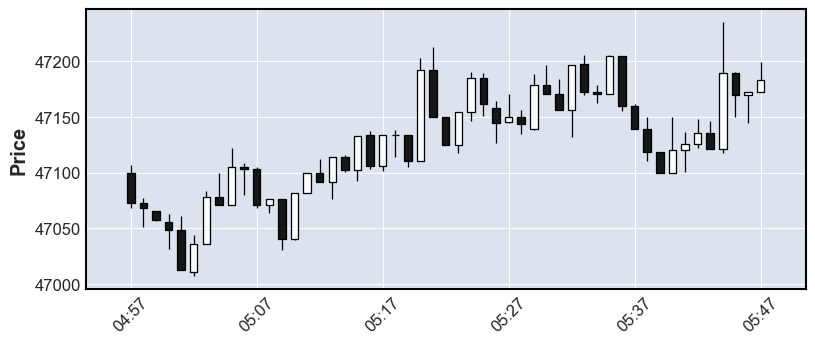

In [81]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hangingman

200527


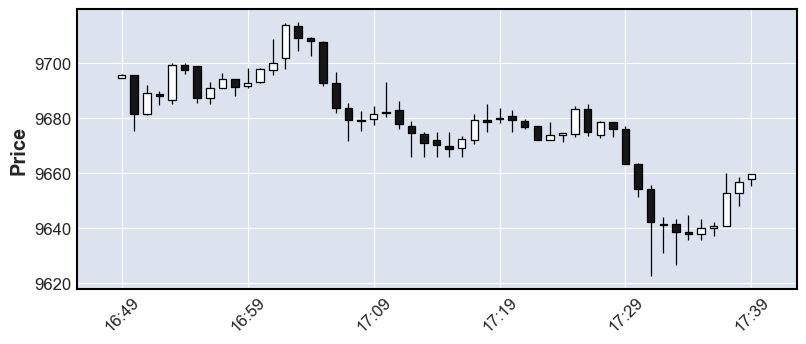

In [82]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

163612


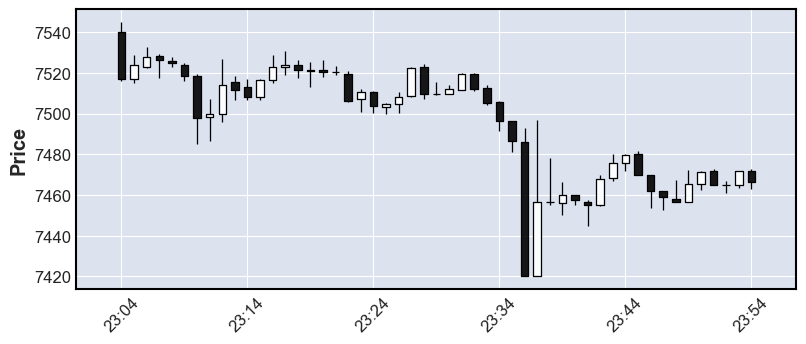

In [83]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Evening Star

885783


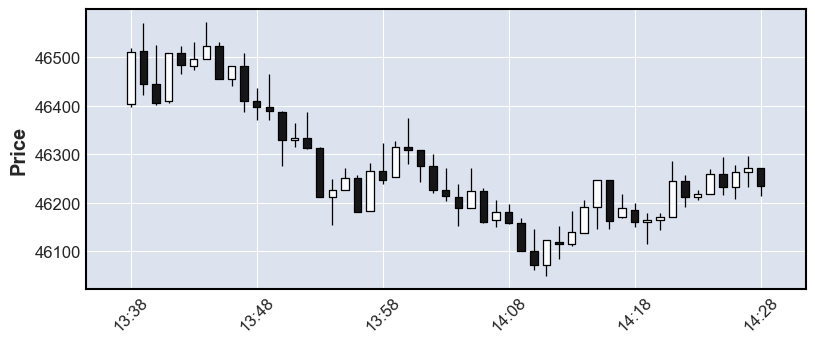

In [84]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [102]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]

In [103]:
df.shape

(1048956, 25)

In [104]:
for i in range(0, len(list_new_column_name_pos)-1):
    df[list_new_column_name_pos[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_pos[i]), 1, 0)

In [105]:
for i in range(0, len(list_new_column_name_neg)-1):
    df[list_new_column_name_neg[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_neg[i]), -1, 0)

In [106]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1577836800000,7195.24,7196.25,7183.14,7186.68,51.642812,1577836859999,371233.518355,493,19.598230,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:01:00,1577836860000,7187.67,7188.06,7182.20,7184.03,7.248148,1577836919999,52080.127788,135,2.031772,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:02:00,1577836920000,7184.41,7184.71,7180.26,7182.43,11.681677,1577836979999,83903.741635,202,5.479244,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:03:00,1577836980000,7183.83,7188.94,7182.49,7185.94,10.025391,1577837039999,72033.226649,136,3.294966,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:04:00,1577837040000,7185.54,7185.54,7178.64,7179.78,14.911105,1577837099999,107066.521825,161,2.369033,...,0,0,0,0,0,0,0,0,0,0


### Check

In [108]:
df[df['CDLSHOOTINGSTAR'] == -100]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:51:00,1577843460000,7205.24,7205.31,7205.04,7205.26,16.023105,1577843519999,1.154507e+05,73,12.365266,...,-100,-100,0,0,0,0,0,0,0,0
2020-01-01 02:06:00,1577844360000,7218.60,7221.32,7218.60,7219.03,4.323330,1577844419999,3.121500e+04,57,0.849059,...,-100,0,0,0,0,0,0,-1,0,0
2020-01-01 02:52:00,1577847120000,7238.00,7240.76,7237.64,7238.76,21.439908,1577847179999,1.552011e+05,220,14.497286,...,-100,0,0,0,0,0,0,-1,0,0
2020-01-01 06:04:00,1577858640000,7225.55,7228.31,7225.50,7226.84,4.430895,1577858699999,3.202228e+04,202,2.464885,...,-100,0,0,0,0,0,0,-1,0,0
2020-01-01 06:14:00,1577859240000,7229.33,7230.00,7229.18,7229.31,6.391835,1577859299999,4.621049e+04,155,1.392283,...,-100,0,0,0,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 14:21:00,1640874060000,47249.79,47286.50,47249.78,47254.82,21.404370,1640874119999,1.011660e+06,616,12.660600,...,-100,0,0,0,0,0,0,0,0,0
2021-12-30 16:28:00,1640881680000,47238.77,47259.63,47238.76,47244.20,24.137770,1640881739999,1.140479e+06,519,16.994270,...,-100,0,0,0,0,0,0,0,0,0
2021-12-30 17:41:00,1640886060000,47574.19,47605.00,47570.84,47587.99,61.111970,1640886119999,2.908803e+06,529,11.174860,...,-100,0,0,0,0,0,0,-1,0,0


## Export the Data

### Export parameters

In [109]:
export_path = "../data"
export_filename = 'binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_processed'
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [110]:
df.to_csv(full_export_path, index=False)